In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [9]:
filePath = input()
colNames = ['dist', 'market', 'comm', 'vary', 'grade', 'minPrice', 'maxPrice', 'modalPrice', 'priceDate']
data = pd.read_csv(filePath, names=colNames)

# D:/VESIT/TE Project/Datasets/Satara_All_Wheat_Updated.csv

D:/VESIT/TE Project/Datasets/Satara_All_Wheat_Updated.csv


In [10]:
data.head(10)

,dist,market,comm,vary,grade,minPrice,maxPrice,modalPrice,priceDate
0,Satara,Koregaon,Wheat,Other,FAQ,2100,2200,2150,02-Mar-19
1,Satara,Koregaon,Wheat,Other,FAQ,1600,1900,1700,27-Jun-16
2,Satara,Koregaon,Wheat,Other,FAQ,1600,1800,1700,21-Jun-16
3,Satara,Koregaon,Wheat,Other,FAQ,1700,1900,1800,22-Mar-16
4,Satara,Koregaon,Wheat,Other,FAQ,1900,2000,1950,17-Nov-15
5,Satara,Koregaon,Wheat,Other,FAQ,1750,1800,1775,02-Nov-15
6,Satara,Koregaon,Wheat,Other,FAQ,1600,1900,1800,29-Sep-15
7,Satara,Koregaon,Wheat,Other,FAQ,1600,1700,1600,13-Jul-15
8,Satara,Koregaon,Wheat,Other,FAQ,1650,1900,1700,11-Jul-15
9,Satara,Koregaon,Wheat,Other,FAQ,1600,2000,1600,09-Jul-15


In [11]:
df = data

# Data Preprocessing

### Converting priceDate to standard YYYY-MM-DD format for better readability

In [12]:
df['priceDate'] = pd.to_datetime(df['priceDate'])

### Sorting the values with respect to ascending date

In [13]:
df = df.sort_values('priceDate', ascending=True)

### Mapping Markets to numbers

In [14]:
market_mapping = {"Koregaon": 0, "Lonand": 1, "Palthan": 2, "Vaduj": 3}
df.market = [market_mapping[item] for item in df.market]

### Mapping Varieties to numbers

In [15]:
variety_mapping = {"Maharashtra 2189": 0, "Other": 1}
df.vary = [variety_mapping[item] for item in df.vary]

### Shortlisting datasets based on market

In [16]:
df_market0 = df[df.market == 0]
df_market1 = df[df.market == 1]
df_market2 = df[df.market == 2]
df_market3 = df[df.market == 3]

### df = df.sort_values(by="date")

In [17]:
df_market_0 = df_market0.sort_values(by="priceDate")
df_market_1 = df_market1.sort_values(by="priceDate")
df_market_2 = df_market2.sort_values(by="priceDate")
df_market_3 = df_market3.sort_values(by="priceDate")

### Dropping unnecessary columns

In [18]:
# df.drop(labels=['Locations', 'Founder'], axis=1)
# df.drop(columns=['Founder', 'Locations'])

df_market_0 = df_market_0.drop(["dist", "market", "comm", "vary", "grade", "maxPrice", "modalPrice"], axis=1)
df_market_1 = df_market_1.drop(["dist", "market", "comm", "vary", "grade", "maxPrice", "modalPrice"], axis=1)
df_market_2 = df_market_2.drop(["dist", "market", "comm", "vary", "grade", "maxPrice", "modalPrice"], axis=1)
df_market_3 = df_market_3.drop(["dist", "market", "comm", "vary", "grade", "maxPrice", "modalPrice"], axis=1)

### Forward Filling price values on dates

In [19]:
r0 = pd.date_range(start=df_market_0.priceDate.min(), end=df_market_0.priceDate.max())
df_market_0 = df_market_0.set_index('priceDate').reindex(r0).fillna(method="ffill").rename_axis('priceDate').reset_index()
df_market_0

,priceDate,minPrice
0,2010-03-20,1450.0
1,2010-03-21,1450.0
2,2010-03-22,1350.0
3,2010-03-23,1350.0
4,2010-03-24,1350.0
...,...,...
3265,2019-02-26,1600.0
3266,2019-02-27,1600.0
3267,2019-02-28,1600.0
3268,2019-03-01,1600.0


In [20]:
r1 = pd.date_range(start=df_market_1.priceDate.min(), end=df_market_1.priceDate.max())

###### This code won't work because df_market_1 has a duplicate entry - two entries for the same date. So when priceDate is converted to indices, there's two indices with same value, which is not allowed, since indices are unique. So we have to take out the duplicate index first, keeping the first index, since the first price announced on the day could serve as a good measure of the minPrice for that day.
```python
df_market_1 = df_market_1.set_index('priceDate').reindex(r1).fillna(method="ffill").rename_axis('priceDate').reset_index()
df_market_1
```

### Converting the priceDate column to the index of the df_market_1 and dropping those tuples who share the same index, except for the very first tuple

In [21]:
df_market_1 = df_market_1.set_index('priceDate')
df_market_1 = df_market_1[~df_market_1.index.duplicated(keep='first')]

In [22]:
df_market_1 = df_market_1.reindex(r1).fillna(method="ffill").rename_axis('priceDate').reset_index()
df_market_1

,priceDate,minPrice
0,2010-03-25,1240.0
1,2010-03-26,1240.0
2,2010-03-27,1240.0
3,2010-03-28,1240.0
4,2010-03-29,1240.0
...,...,...
3734,2020-06-14,1900.0
3735,2020-06-15,1900.0
3736,2020-06-16,1900.0
3737,2020-06-17,1900.0


# ————————————————————————————————————

In [23]:
r2 = pd.date_range(start=df_market_2.priceDate.min(), end=df_market_2.priceDate.max())

In [24]:
df_market_2 = df_market_2.set_index('priceDate')
df_market_2 = df_market_2[~df_market_2.index.duplicated(keep='first')]

In [25]:
df_market_2 = df_market_2.reindex(r2).fillna(method="ffill").rename_axis('priceDate').reset_index()
df_market_2

,priceDate,minPrice
0,2010-03-22,1100.0
1,2010-03-23,1100.0
2,2010-03-24,1100.0
3,2010-03-25,1100.0
4,2010-03-26,1100.0
...,...,...
4377,2022-03-16,2150.0
4378,2022-03-17,2150.0
4379,2022-03-18,2150.0
4380,2022-03-19,2150.0


# ————————————————————————————————————

In [26]:
r3 = pd.date_range(start=df_market_3.priceDate.min(), end=df_market_3.priceDate.max())
df_market_3 = df_market_3.set_index('priceDate').reindex(r3).fillna(method="ffill").rename_axis('priceDate').reset_index()
df_market_3

,priceDate,minPrice
0,2010-03-20,1500.0
1,2010-03-21,1500.0
2,2010-03-22,1500.0
3,2010-03-23,1500.0
4,2010-03-24,1500.0
...,...,...
4413,2022-04-19,2000.0
4414,2022-04-20,2000.0
4415,2022-04-21,2000.0
4416,2022-04-22,2000.0


### Extracting X and Y dataframes 

In [27]:
df_market_0_x = df_market_0.filter(['priceDate'], axis=1)
df_market_0_y = df_market_0.filter(['minPrice'], axis=1)

df_market_1_x = df_market_1.filter(['priceDate'], axis=1)
df_market_1_y = df_market_1.filter(['minPrice'], axis=1)

df_market_2_x = df_market_2.filter(['priceDate'], axis=1)
df_market_2_y = df_market_2.filter(['minPrice'], axis=1)

df_market_3_x = df_market_3.filter(['priceDate'], axis=1)
df_market_3_y = df_market_3.filter(['minPrice'], axis=1)

# Alogrithm Part

In [28]:
timeseries_data_0 = df_market_0_y['minPrice'].tolist()
timeseries_data_1 = df_market_1_y['minPrice'].tolist()
timeseries_data_2 = df_market_2_y['minPrice'].tolist()
timeseries_data_3 = df_market_3_y['minPrice'].tolist()

In [29]:
#number of time steps

n_steps = 5

In [30]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [31]:
X0,y0 = prepare_data(timeseries_data_0, n_steps)
X1,y1 = prepare_data(timeseries_data_1, n_steps)
X2,y2 = prepare_data(timeseries_data_2, n_steps)
X3,y3 = prepare_data(timeseries_data_3, n_steps)

### Reshaping the data
##### (Necessary for LSTM, to convert this shape to a 3-dimensional shape)

In [32]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1

X0 = X0.reshape((X0.shape[0], X0.shape[1], n_features))
X1 = X1.reshape((X1.shape[0], X1.shape[1], n_features))
X2 = X2.reshape((X2.shape[0], X2.shape[1], n_features))
X3 = X3.reshape((X3.shape[0], X3.shape[1], n_features))

 ## Building the LSTM Model - KN

### Importing Model Dependencies

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

### The actual model ---

In [34]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

### Test and Train Split

In [35]:
x_train_0,x_test_0,y_train_0,y_test_0 = train_test_split(X0, y0, test_size=0.2, shuffle=False)
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(X1, y1, test_size=0.2, shuffle=False)
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(X2, y2, test_size=0.2, shuffle=False)
x_train_3,x_test_3,y_train_3,y_test_3 = train_test_split(X3, y3, test_size=0.2, shuffle=False)

### Runnning the Models

In [37]:
history_0 = model.fit(x_train_0,y_train_0,epochs=300,verbose=1,validation_data=(x_test_0,y_test_0))

Epoch 1/300
82/82 [==============================] - 0s 4ms/step - loss: 16.8985 - accuracy: 0.0000e+00 - val_loss: 25.3293 - val_accuracy: 0.0000e+00
Epoch 2/300
82/82 [==============================] - 0s 4ms/step - loss: 16.7576 - accuracy: 0.0000e+00 - val_loss: 14.0911 - val_accuracy: 0.0000e+00
Epoch 3/300
82/82 [==============================] - 0s 4ms/step - loss: 17.4270 - accuracy: 0.0000e+00 - val_loss: 5.1916 - val_accuracy: 0.0000e+00
Epoch 4/300
82/82 [==============================] - 0s 4ms/step - loss: 13.6046 - accuracy: 0.0000e+00 - val_loss: 12.4145 - val_accuracy: 0.0000e+00
Epoch 5/300
82/82 [==============================] - 0s 4ms/step - loss: 15.4076 - accuracy: 0.0000e+00 - val_loss: 1.4734 - val_accuracy: 0.0000e+00
Epoch 6/300
82/82 [==============================] - 0s 4ms/step - loss: 15.3123 - accuracy: 0.0000e+00 - val_loss: 1.6755 - val_accuracy: 0.0000e+00
Epoch 7/300
82/82 [==============================] - 0s 4ms/step - loss: 13.5288 - accuracy: 0.00

In [40]:
history_1 = model.fit(x_train_1,y_train_1,epochs=300,verbose=0,validation_data=(x_test_1,y_test_1))

In [41]:
history_2 = model.fit(x_train_2,y_train_2,epochs=300,verbose=0,validation_data=(x_test_2,y_test_2))

In [39]:
history_3 = model.fit(x_train_3,y_train_3,epochs=300,verbose=1,validation_data=(x_test_3,y_test_3))

Epoch 1/300
111/111 [==============================] - 0s 4ms/step - loss: 19.8700 - accuracy: 0.0000e+00 - val_loss: 6.8758 - val_accuracy: 0.0000e+00
Epoch 2/300
111/111 [==============================] - 0s 4ms/step - loss: 19.5358 - accuracy: 0.0000e+00 - val_loss: 8.7659 - val_accuracy: 0.0000e+00
Epoch 3/300
111/111 [==============================] - 0s 4ms/step - loss: 19.6471 - accuracy: 0.0000e+00 - val_loss: 16.0492 - val_accuracy: 0.0000e+00
Epoch 4/300
111/111 [==============================] - 0s 4ms/step - loss: 20.8052 - accuracy: 0.0000e+00 - val_loss: 15.3981 - val_accuracy: 0.0000e+00
Epoch 5/300
111/111 [==============================] - 1s 5ms/step - loss: 19.4268 - accuracy: 0.0000e+00 - val_loss: 6.6198 - val_accuracy: 0.0000e+00
Epoch 6/300
111/111 [==============================] - 0s 4ms/step - loss: 19.5689 - accuracy: 0.0000e+00 - val_loss: 5.2759 - val_accuracy: 0.0000e+00
Epoch 7/300
111/111 [==============================] - 0s 4ms/step - loss: 19.1884 - a

### Compiling the results

In [42]:
results_0 = model.predict(x_test_0)
results_1 = model.predict(x_test_1)
results_2 = model.predict(x_test_2)
results_3 = model.predict(x_test_3)

## Picturizing results

In [43]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

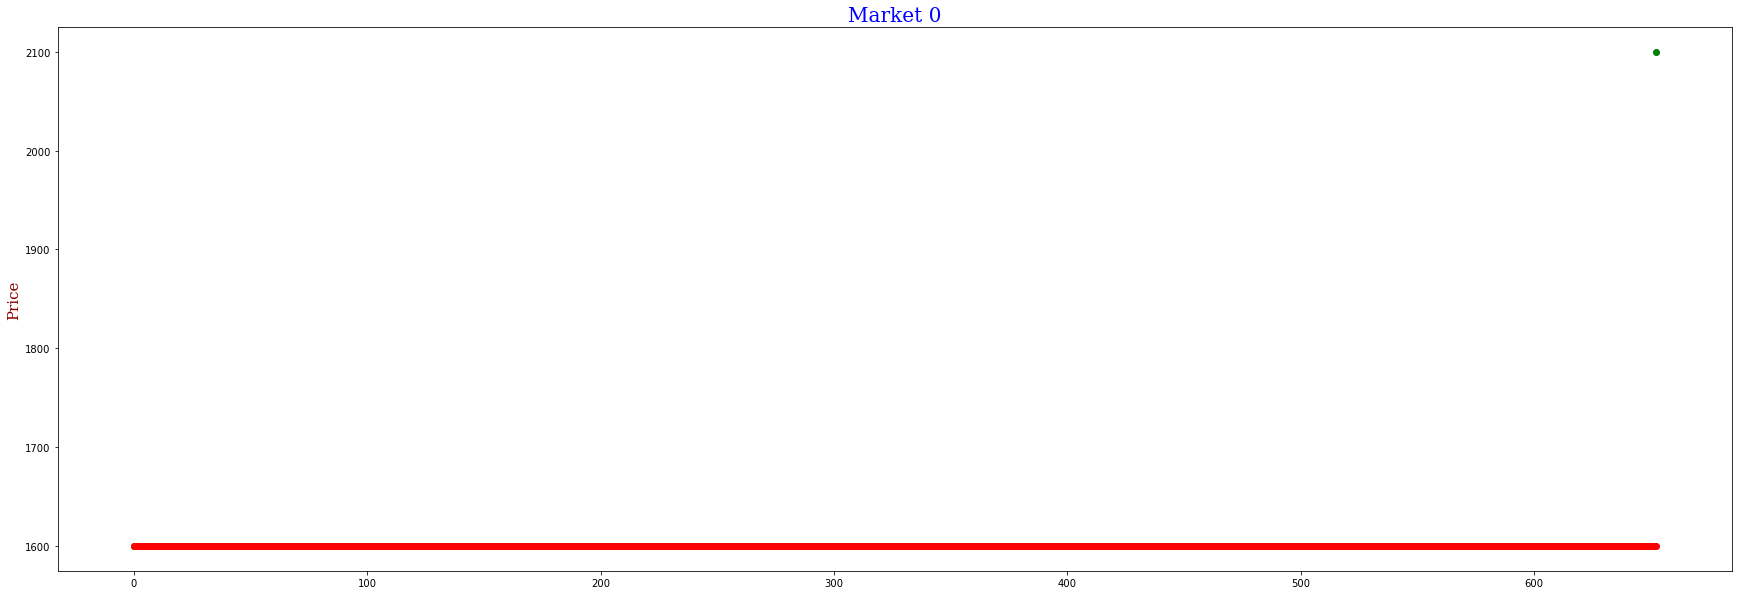

In [44]:
fig = plt.gcf()
fig.set_size_inches(30, 10, forward=True)

plt.title("Market 0", fontdict = font1)
plt.ylabel("Price", fontdict = font2)

plt.scatter(range(y_test_0.shape[0]), y_test_0, c="g")
plt.scatter(range(results_0.shape[0]), results_0,c="r")
plt.show()

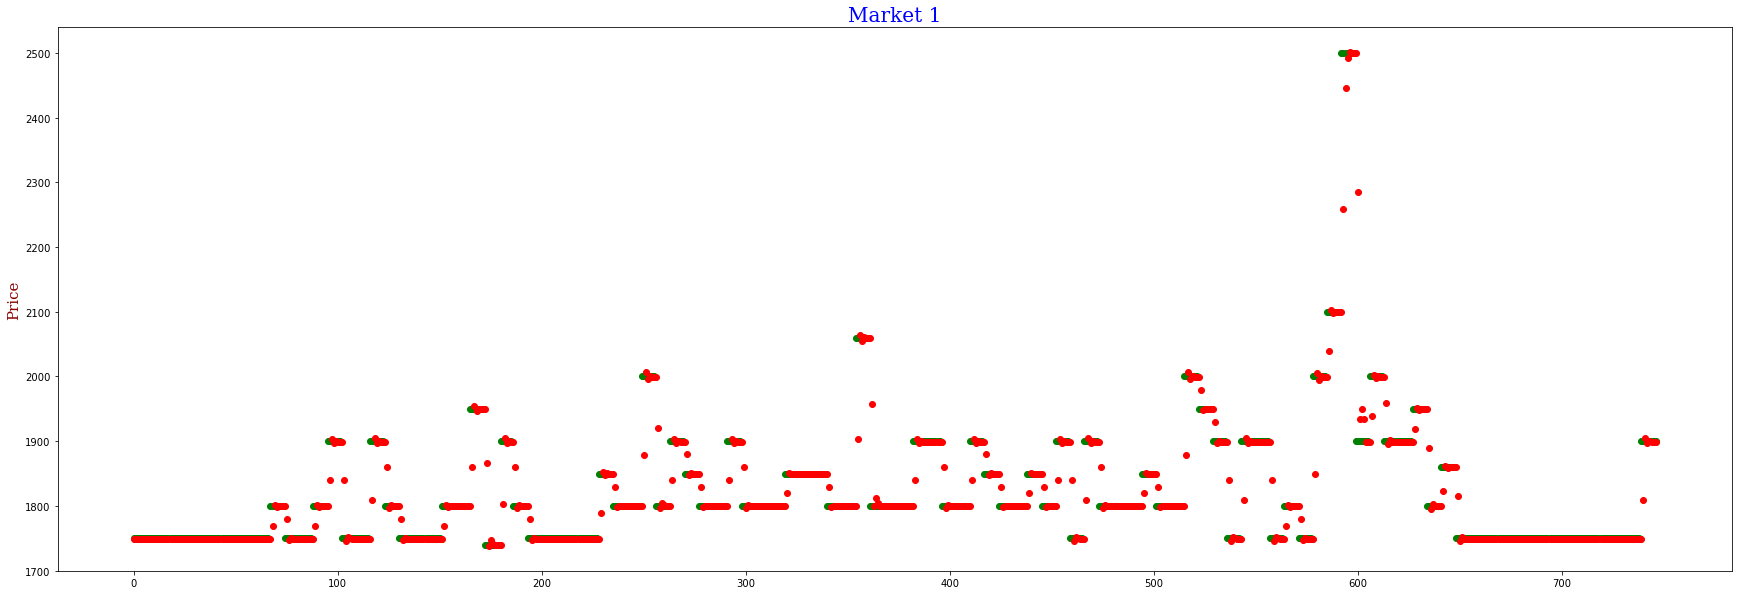

In [45]:
fig = plt.gcf()
fig.set_size_inches(30, 10, forward=True)

plt.title("Market 1", fontdict = font1)
plt.ylabel("Price", fontdict = font2)

plt.scatter(range(y_test_1.shape[0]), y_test_1, c="g")
plt.scatter(range(results_1.shape[0]), results_1,c="r")
plt.show()

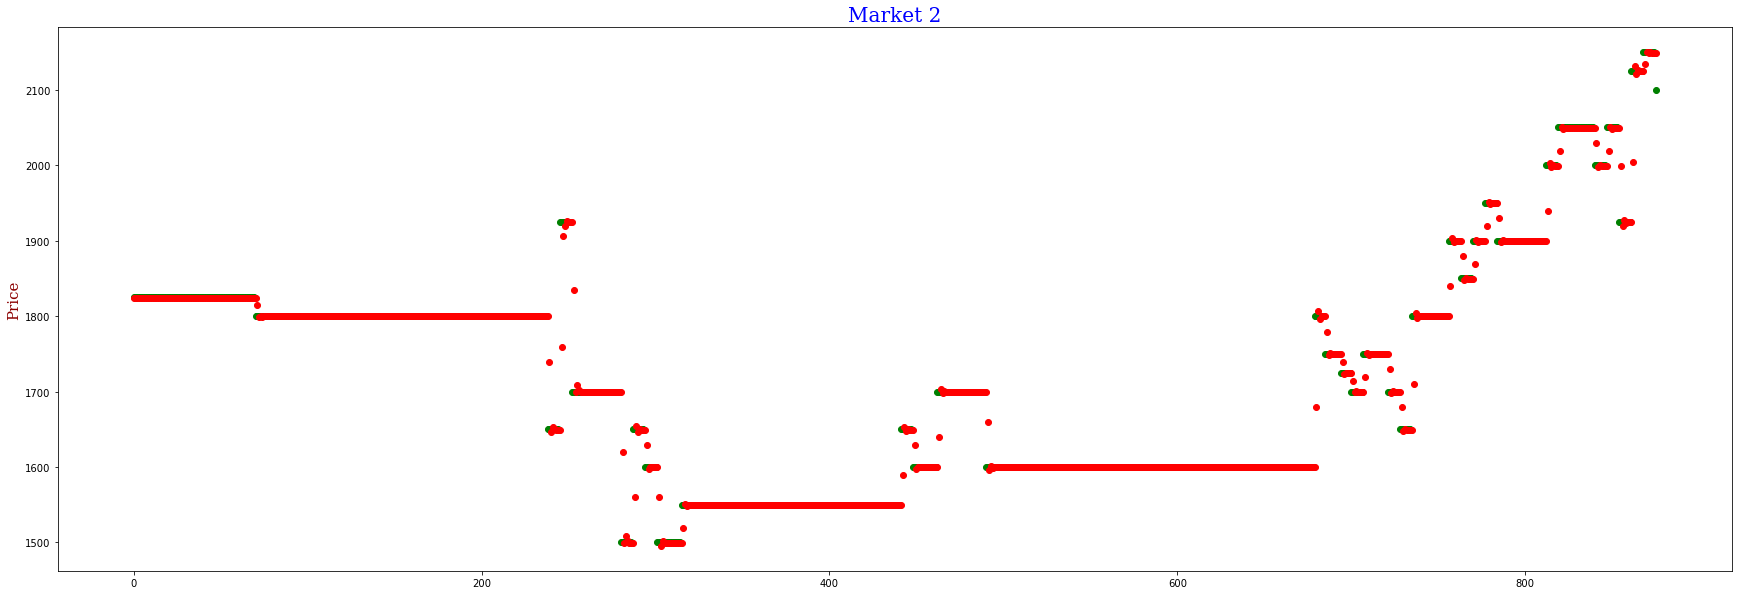

In [46]:
fig = plt.gcf()
fig.set_size_inches(30, 10, forward=True)

plt.title("Market 2", fontdict = font1)
plt.ylabel("Price", fontdict = font2)

plt.scatter(range(y_test_2.shape[0]), y_test_2, c="g")
plt.scatter(range(results_2.shape[0]), results_2,c="r")
plt.show()

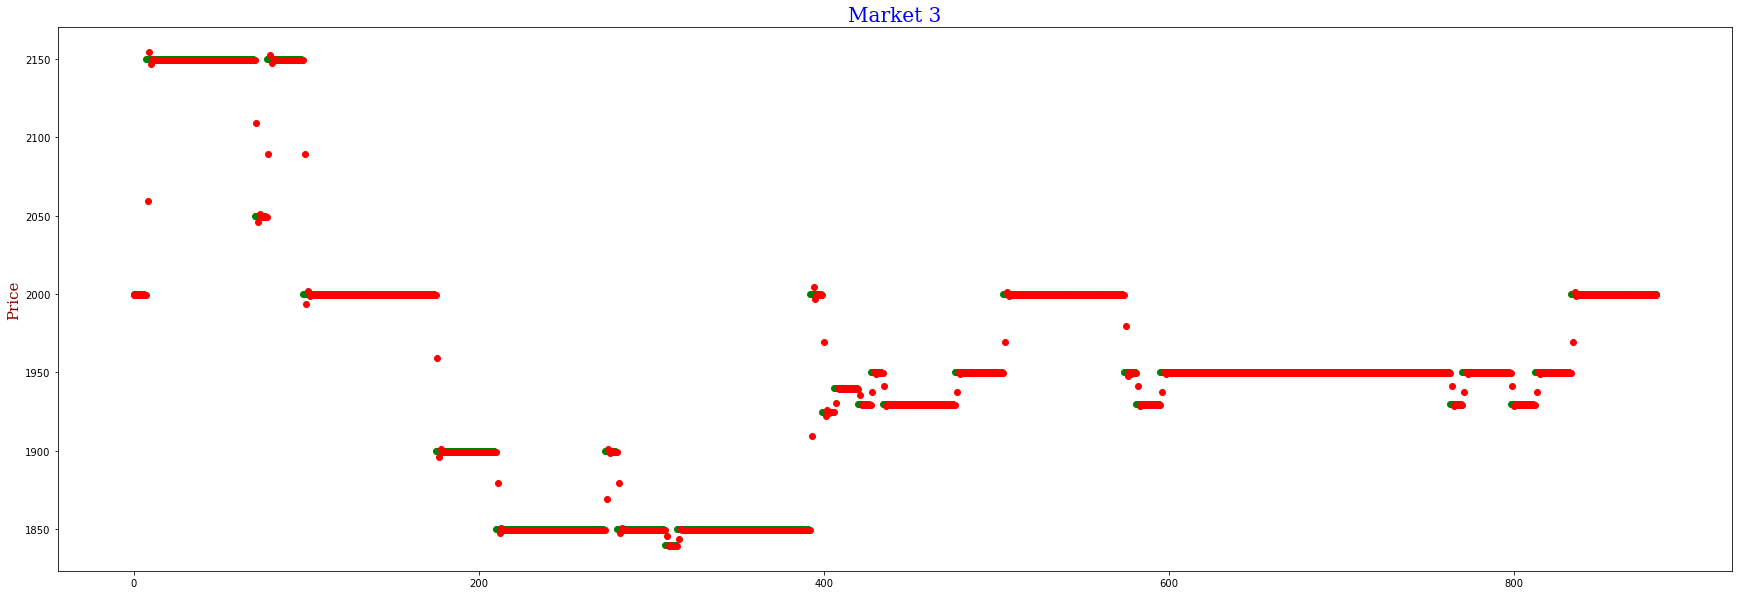

In [47]:
fig = plt.gcf()
fig.set_size_inches(30, 10, forward=True)

plt.title("Market 3", fontdict = font1)
plt.ylabel("Price", fontdict = font2)

plt.scatter(range(y_test_3.shape[0]), y_test_3, c="g")
plt.scatter(range(results_3.shape[0]), results_3,c="r")
plt.show()

## Predicting the Future prices

In [48]:
results_0 = results_0.reshape(results_0.shape[0],)
results_1 = results_1.reshape(results_1.shape[0],)
results_2 = results_2.reshape(results_2.shape[0],)
results_3 = results_3.reshape(results_3.shape[0],)

In [49]:
results_list_0 = results_0.tolist()
results_list_1 = results_1.tolist()
results_list_2 = results_2.tolist()
results_list_3 = results_3.tolist()

In [50]:
x_input_list_0 = []
x_input_list_1 = []
x_input_list_2 = []
x_input_list_3 = []


for i in results_list_0[len(results_list_0)-5:len(results_list_0)]:
    x_input_list_0.append(i)

for i in results_list_1[len(results_list_1)-5:len(results_list_1)]:
    x_input_list_1.append(i)
    
for i in results_list_2[len(results_list_2)-5:len(results_list_2)]:
    x_input_list_2.append(i)

for i in results_list_3[len(results_list_3)-5:len(results_list_3)]:
    x_input_list_3.append(i)

### Predicting the next n days

#### MARKET 3 - just replace the "3" with 0, 1, 2 for the respective markets (pfft copy paste)

In [51]:
# demonstrate prediction for next n days
n_days = 30
x_input_3 = np.array(x_input_list_3)
temp_input=list(x_input_3)
lst_output=[]
i=0
while(i<n_days):
    
    if(len(temp_input)>5):
        x_input_3=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input_3))
        #print(x_input)
        x_input_3 = x_input_3.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input_3, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input_3 = x_input_3.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input_3, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[1998.8466]
1 day input [1999.4230957  1999.4230957  1999.4230957  1999.4230957  1998.84655762]
1 day output [[1998.6165]]
2 day input [1999.4230957  1999.4230957  1999.4230957  1998.84655762 1998.61645508]
2 day output [[1998.1587]]
3 day input [1999.4230957  1999.4230957  1998.84655762 1998.61645508 1998.15869141]
3 day output [[1997.8602]]
4 day input [1999.4230957  1998.84655762 1998.61645508 1998.15869141 1997.86022949]
4 day output [[1997.4487]]
5 day input [1998.8466 1998.6165 1998.1587 1997.8602 1997.4487]
5 day output [[1997.1173]]
6 day input [1998.6165 1998.1587 1997.8602 1997.4487 1997.1173]
6 day output [[1996.7295]]
7 day input [1998.1587 1997.8602 1997.4487 1997.1173 1996.7295]
7 day output [[1996.3817]]
8 day input [1997.8602 1997.4487 1997.1173 1996.7295 1996.3817]
8 day output [[1996.0061]]
9 day input [1997.4487 1997.1173 1996.7295 1996.3817 1996.0061]
9 day output [[1995.6501]]
10 day input [1997.1173 1996.7295 1996.3817 1996.0061 1995.6501]
10 day output [[1995.281

In [52]:
import datetime

In [53]:
predictions = {}

for i in range(len(lst_output)):
    predictions[str((df_market_3.priceDate.max()+datetime.timedelta(i+1)).date())] = lst_output[i]

### Predictions for the next 30 days

In [54]:
predictions

{'2022-04-24': 1998.8466,
 '2022-04-25': 1998.6165,
 '2022-04-26': 1998.1587,
 '2022-04-27': 1997.8602,
 '2022-04-28': 1997.4487,
 '2022-04-29': 1997.1173,
 '2022-04-30': 1996.7295,
 '2022-05-01': 1996.3817,
 '2022-05-02': 1996.0061,
 '2022-05-03': 1995.6501,
 '2022-05-04': 1995.281,
 '2022-05-05': 1994.9214,
 '2022-05-06': 1994.5553,
 '2022-05-07': 1994.1941,
 '2022-05-08': 1993.8296,
 '2022-05-09': 1993.4675,
 '2022-05-10': 1993.1042,
 '2022-05-11': 1992.742,
 '2022-05-12': 1992.3792,
 '2022-05-13': 1992.0168,
 '2022-05-14': 1991.6545,
 '2022-05-15': 1991.2925,
 '2022-05-16': 1990.9307,
 '2022-05-17': 1990.5688,
 '2022-05-18': 1990.2075,
 '2022-05-19': 1989.846,
 '2022-05-20': 1989.4846,
 '2022-05-21': 1989.1235,
 '2022-05-22': 1988.7623,
 '2022-05-23': 1988.4017}